Importamos librerias

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Obtenemos la data y separamos X de Y

In [11]:
data = pd.read_csv('./mnist_test.csv',header=None)
data = data.sample(n=1000)
X = data.drop(columns=0)
Y = data.iloc[:,0]

Indicamos a Kmeans que queremos 10 clusters y usamos la inicialización K+Means++

In [12]:
from sklearn.cluster import KMeans

modelo = KMeans(n_clusters=10,init='k-means++').fit(X)

Como la data es una "imagen" de 28*28 pixeles, podemos graficar los centroides para obtener el elemento prototipo de cada cluster.

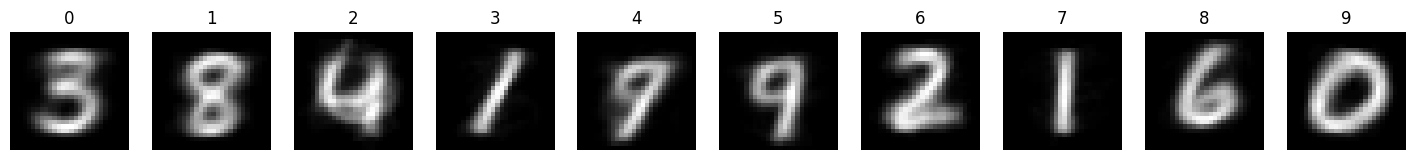

In [13]:
num = modelo.n_clusters
fig, axs = plt.subplots(1, num,figsize=(18, 2))
for cluster, vector_prototipo in enumerate(modelo.cluster_centers_):
  axs[cluster].imshow(np.reshape(vector_prototipo,(28,28)),cmap='gray')
  axs[cluster].axis("off")
  axs[cluster].set_title(cluster)

Usando la matriz de confusión, podemos ver qué clusters contienen qué clases y en dónde se mezclan.

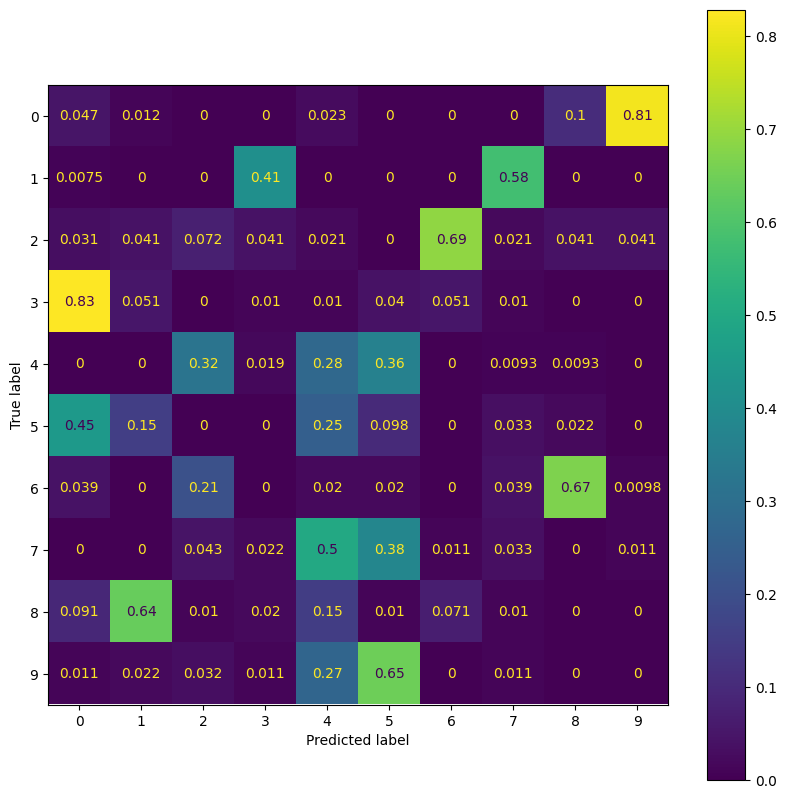

In [14]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(Y,modelo.labels_,normalize='true')
fig, ax = plt.subplots(figsize=(10,10))
disp = ConfusionMatrixDisplay(cm,display_labels=range(10))
disp.plot(ax=ax)

Adicionalmente se pueden obtener métricas numéricas de qué tan bien está agrupando.
Las métricas se dividen en dos grandes clases.
* Cuando conocemos la etiqueta objetivo "Y"
* Cuando no conocemos la etiqueta objetivo

In [15]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

In [16]:
score1=[]
score2=[]
score3=[]
modelos=[]

for i in range(2,20):
  modelo = KMeans(n_clusters=i).fit(X)
  score1.append(silhouette_score(X,modelo.labels_,metric='cityblock'))
  score2.append(calinski_harabasz_score(X,modelo.labels_))
  score3.append(davies_bouldin_score(X,modelo.labels_))
  modelos.append(modelo)

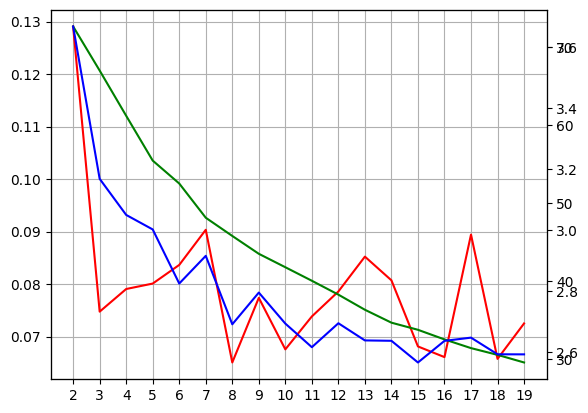

In [17]:
fig, ax1 = plt.subplots()
ax1.set_xticks(range(2,20))
ax1.plot(range(2,20),score1,'r')
ax1.grid()

ax2=ax1.twinx()
ax2.plot(range(2,20),score2,'g')

ax3 = ax1.twinx()
ax3.plot(range(2,20),score3,'b')

In [18]:
from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.mixture import GaussianMixture

iris = datasets.load_iris()
X = iris.data
Y = iris.target